In [2]:
#Using Machine learning to predict how NBA Players will progress in future seasons,
#and season statistics such as future stat leaders and MVPs.

#Data used was from NBA_webscraping where a csv file was created

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


filename = 'nba_player_data.csv'


In [3]:
pd.read_csv(filename)

,Year,Season_Type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,2014-15,Regular%20Season,201566,1,Russell Westbrook,1610612760,OKC,67,34.4,9.4,...,0.835,1.9,5.4,7.3,8.6,2.1,0.2,4.4,28.1,27.7
1,2014-15,Regular%20Season,201935,2,James Harden,1610612745,HOU,81,36.8,8.0,...,0.868,0.9,4.7,5.7,7.0,1.9,0.7,4.0,27.4,27.2
2,2014-15,Regular%20Season,2544,3,LeBron James,1610612739,CLE,69,36.1,9.0,...,0.710,0.7,5.3,6.0,7.4,1.6,0.7,3.9,25.3,25.3
3,2014-15,Regular%20Season,203076,4,Anthony Davis,1610612740,NOP,68,36.1,9.4,...,0.805,2.5,7.7,10.2,2.2,1.5,2.9,1.4,24.4,30.3
4,2014-15,Regular%20Season,202326,5,DeMarcus Cousins,1610612758,SAC,59,34.1,8.4,...,0.782,3.1,9.5,12.7,3.6,1.5,1.7,4.3,24.1,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,2023-24,Regular%20Season,1630550,258,JT Thor,1610612766,CHA,35,14.8,1.3,...,0.444,1.1,1.7,2.8,0.4,0.2,0.5,0.3,3.3,4.4
3741,2023-24,Regular%20Season,1630192,259,Zeke Nnaji,1610612743,DEN,36,9.4,1.1,...,0.641,1.1,1.0,2.1,0.5,0.3,0.6,0.6,3.1,4.2
3742,2023-24,Regular%20Season,1629637,260,Jaxson Hayes,1610612747,LAL,36,9.5,1.2,...,0.536,0.4,1.2,1.7,0.3,0.2,0.3,0.5,2.8,3.9
3743,2023-24,Regular%20Season,1641748,261,Andre Jackson Jr.,1610612749,MIL,38,11.4,1.1,...,0.889,0.9,1.3,2.2,0.9,0.3,0.1,0.5,2.8,4.8


In [4]:

# Define functions to obtain column names of CSV and to collect data from specific columns
def column_data(fname, column_offsets):
    data = np.loadtxt(fname, dtype=str, delimiter=',', usecols=column_offsets)
    return data


def getcolumns(fname):
    with open(fname) as fid:
        csv_reader = csv.reader(fid, delimiter=',')
        column_names = next(csv_reader)
    return np.array(column_names)

filename = 'nba_player_data.csv'

# Get column names and data
nba_cols = getcolumns(filename)
data = pd.read_csv(filename)

input = column_data(filename, range(len(nba_cols)))

# Extract offsets if needed for later functions
player_offset = list(nba_cols).index('PLAYER')
rank_offset = list(nba_cols).index('RANK')
year_offset = list(nba_cols).index('Year')
points_offset = list(nba_cols).index("PTS")

# Select relevant features for prediction
selected_features = ['PTS', 'AST', 'REB', 'STL', 'BLK']



In [5]:

# Use to switch the player that you want to analyze
target_player = "Luka Doncic" 

#CHANGE desired stat to trend and predicted value for particular stat
desired_stat = 'PTS'

target_data = data[data['PLAYER'] == target_player]

X = target_data[selected_features]
y = target_data[['PTS', 'AST', 'REB', 'STL', 'BLK']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, train_size=0.9)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.8265750000000065
Mean Absolute Error (Random Forest): 0.5902000000000013
R-squared (Random Forest): nan


/Users/sujaypatel/downloads/ENTER/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [6]:

# List to store predicted stats for each player
all_player_predictions = []

for player_name in data['PLAYER'].unique():
    player_data = data[data['PLAYER'] == player_name]
    selected_features_input = ['PTS', 'AST', 'REB', 'STL', 'BLK']
    X_player = player_data[selected_features_input]
    player_predictions = rf_model.predict(X_player)
    predicted_stats = dict(zip(selected_features, player_predictions))
    predicted_stats['PLAYER'] = player_name
    all_player_predictions.append(predicted_stats)


# Convert the list of dictionaries to a DataFrame
predicted_stats_df = pd.DataFrame(all_player_predictions)

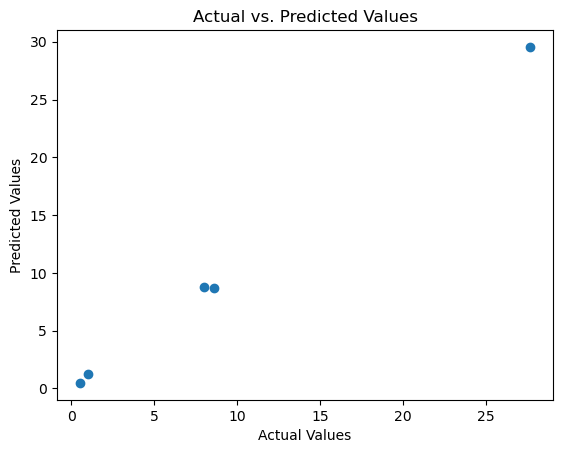

In [7]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

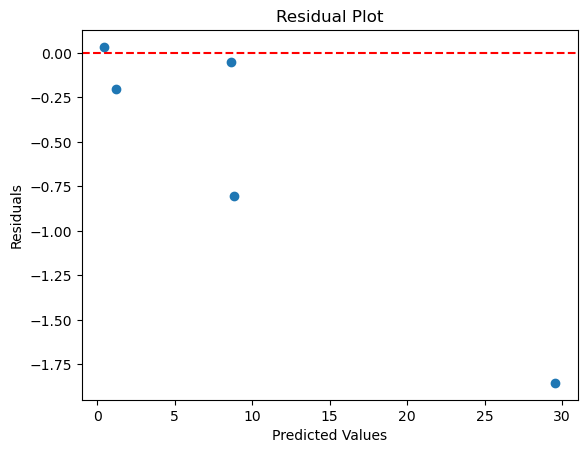

In [8]:
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  
plt.show()

In [9]:
def predict_player_stats(model, current_season_data):

    # Extract relevant features from the current season data
    selected_features = ['PTS', 'AST', 'REB', 'STL', 'BLK']
    player_data = current_season_data[selected_features]

    # Predict stats for the next season
    predicted_stats_next_season = model.predict(player_data)

    # Create a DataFrame for a more structured output
    predicted_stats_df = pd.DataFrame(data=predicted_stats_next_season, columns=selected_features)
   

    return predicted_stats_df


# Call the function to get predictions
predictions_df = predict_player_stats(rf_model, target_data)

# Print or use the DataFrame as needed
print("Predicted Stats for the next Season:")
print(predictions_df.tail(1))

Predicted Stats for the next Season:
      PTS    AST    REB    STL    BLK
8  32.936  8.947  8.692  1.398  0.571


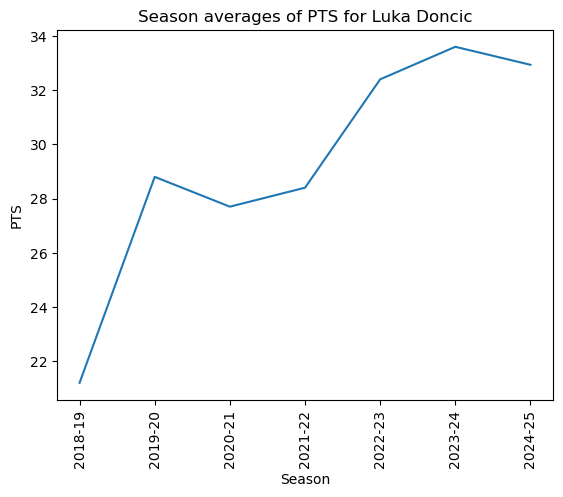

In [10]:
def plot_predicted_stats(stats, real_career_df, predicted_stats, player_input):

    # Only account for regular season
    real_career = real_career_df[real_career_df['PLAYER'] == player_input].drop_duplicates(subset='Year')

    #Make X-axis the years of plot
    year_col = real_career['Year']
    xvalues = []
    for year in year_col:
        xvalues.append(year)

    #Make Y-axis the desired stat
    yvalues = []
    stat_column = real_career[stats]
    for stat in stat_column:
        yvalues.append(stat)
        
    #Append predicted stats
    predicted_stat = ((predicted_stats[stats]).iloc[-1])

    predicted_stat = predicted_stat.astype(float)
    xvalues.append('2024-25')
    yvalues.append(predicted_stat)

    plt.plot(range(len(xvalues)), yvalues)
    plt.xticks(range(len(xvalues)), xvalues, rotation='vertical')
    plt.ylabel(stats)
    plt.xlabel("Season")
    plt.title("Season averages of " + str(stats) + " for " + str(player_input))
    plt.show()

#Plot career data and predicted value for player
plot_predicted_stats(desired_stat, data, predictions_df, target_player)
    

In [11]:

selected_features = ['PTS', 'AST', 'REB', 'STL', 'BLK']
z = data[selected_features]
v = data[['PTS', 'AST', 'REB', 'STL', 'BLK']]

z_train, z_test, v_train, v_test = train_test_split(z, v, test_size=0.1, random_state=42)

#Choose a Model
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

#Train the Model
best_model = MultiOutputRegressor(random_forest_model)
best_model.fit(z_train, v_train)

#Evaluate the Model
v_pred = best_model.predict(z_test)

mse = mean_squared_error(v_test, v_pred)
mae = mean_absolute_error(v_test, v_pred)
r2 = r2_score(v_test, v_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0010382058666666611
Mean Absolute Error: 0.002099200000003412
R-squared: 0.9992544618138461


In [12]:
def predict_season_stats(model1, data1, selected_features1, stats_to_predict1):
    # Initialize an empty DataFrame to store predictions
    all_predictions_df = pd.DataFrame()

    # Iterate over each stat to predict
    for stat1 in stats_to_predict1:
        # Iterate over each player in the dataset
        for player_name1 in data1['PLAYER'].unique():
            # Filter data for the specific player
            target_data1 = data1[data1['PLAYER'] == player_name1]

            # Get the latest season data for the player
            latest_season = target_data1.groupby('PLAYER')['Year'].max().reset_index()
            current_season_data = pd.merge(latest_season, target_data1, on=['PLAYER', 'Year'], how='inner')

            # Ensure the order of selected features matches the order during training
            current_season_data = current_season_data[selected_features1]

            # Predict the stat for the next season
            predicted_stats = model1.predict(current_season_data)

            # Create a DataFrame for the predictions
            predicted_stats_df = pd.DataFrame(data=predicted_stats, columns=selected_features)
            predicted_stats_df['PLAYER'] = player_name1
            predicted_stats_df['STAT'] = stat1  # Add the stat column

            # Append the predictions to the overall DataFrame
            all_predictions_df = pd.concat([all_predictions_df, predicted_stats_df], ignore_index=True)

    return all_predictions_df

# Example usage
selected_features = ['PTS', 'AST', 'REB', 'STL', 'BLK']
stats_to_predict = ['PTS', 'AST', 'REB', 'STL', 'BLK']

predictions_df = predict_season_stats(best_model, data, selected_features, stats_to_predict)
print(predictions_df)


KeyboardInterrupt: 

In [94]:
for stat in stats_to_predict:
    # Filter predictions for the specific stat
    stat_predictions = predictions_df[predictions_df['STAT'] == stat]

    # Sort and print the top 5 players for the stat
    top_5_players = stat_predictions.sort_values(by=stat, ascending=False).head(5)
    
    print(f"Top 5 Players for {stat}:")
    print(top_5_players[['PLAYER', stat]])
    print("\n")

Top 5 Players for PTS:
                      PLAYER     PTS
505              Joel Embiid  35.596
565              Luka Doncic  33.769
61              Bradley Beal  31.329
95     Giannis Antetokounmpo  31.323
574  Shai Gilgeous-Alexander  31.127


Top 5 Players for AST:
                 PLAYER     AST
1579  Tyrese Haliburton  11.524
1449         Trae Young  10.800
907           John Wall  10.698
908           John Wall  10.255
1448        Luka Doncic   9.283


Top 5 Players for REB:
                     PLAYER     REB
2244       Domantas Sabonis  12.711
1962            Rudy Gobert  12.498
1769          Anthony Davis  12.204
2144           Nikola Jokic  11.891
1861  Giannis Antetokounmpo  11.689


Top 5 Players for STL:
                       PLAYER    STL
2985           Andre Roberson  2.400
3090              T.J. Warren  2.301
3223  Shai Gilgeous-Alexander  2.301
2673                John Wall  2.000
3155         Donovan Mitchell  1.900


Top 5 Players for BLK:
                 PLAYER  

In [13]:
def predict_mvp_candidates(model2, data2, selected_features2, weights2):
    
    unique_players = data2['PLAYER'].unique()

    
    mvp_scores = []
    mvp_player = []

    for player_name2 in unique_players:
        
        player_data2 = data2[data2['PLAYER'] == player_name2]

        # Extract the latest season data
        latest_season2 = player_data2.groupby('PLAYER')['Year'].max().reset_index()
        current_season_data2 = pd.merge(latest_season2, player_data2, on=['PLAYER', 'Year'], how='inner')

        # Predict stats for the current season
        predicted_stats2 = model2.predict(current_season_data2[selected_features2].astype(float))
        predicted_stats_df2 = pd.DataFrame(data=predicted_stats2.astype(float), columns=selected_features2)
        predicted_stats_df2['PLAYER'] = current_season_data2['PLAYER']

        # Calculate MVP score (weighted sum of stats)
        mvp_score = (sum(predicted_stats_df2[feature] * weight for feature, weight in zip(selected_features2, weights2))).astype(float)
        
        # Append player and MVP score to the list
        mvp_player.append(player_name2)
        mvp_scores.append(float(str(mvp_score)[5:9]))
        
    
    sorted_scores = sorted(range(len(mvp_scores)), key=lambda k: mvp_scores[k], reverse=True)

    top_5_mvp_players = []

    for i in range(5):
        index = sorted_scores[i]
        top_5_mvp_players.append((mvp_player[index], mvp_scores[index]))

    # Print results
    print("Top 5 Players with the Highest MVP Scores:")
    for player, mvp_score in top_5_mvp_players:
        print(f"Player: {player}, MVP Score: {mvp_score}")


In [206]:
selected_features = ['PTS', 'AST', 'REB', 'STL', 'BLK']
weights = [0.4, 0.3, 0.2, 0.05, 0.05]  # Adjust weights based on importance for MVP selection

mvp_candidates = predict_mvp_candidates(best_model, data, selected_features, weights)



Top 5 Players with the Highest MVP Scores:
Player: Joel Embiid, MVP Score: 18.4
Player: Luka Doncic, MVP Score: 18.0
Player: Giannis Antetokounmpo, MVP Score: 16.8
Player: Nikola Jokic, MVP Score: 15.6
Player: Shai Gilgeous-Alexander, MVP Score: 15.6
